# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from collections import Counter

#importing necessary libraries

# Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\ODOSA\Downloads\Consumer_Complaints.xlsx - Data.csv")

# data is imported as "df"

In [3]:
df

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
62511,2501211,Web,2017-06-04,2017-06-04,TX,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,Company has responded to the consumer and the ...,Closed with explanation,Yes
62512,2472406,Referral,2017-05-01,2017-05-05,VA,Checking or savings account,Other banking product or service,Problem caused by your funds being low,Non-sufficient funds and associated fees,Company has responded to the consumer and the ...,Closed with explanation,Yes
62513,3704015,Web,2020-06-17,2020-06-17,TN,"Credit reporting, credit repair services, or o...",Credit repair services,Confusing or missing disclosures,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
62514,2488973,Referral,2017-05-19,2017-05-19,GA,Mortgage,Other type of mortgage,Trouble during payment process,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [4]:
df.head()

# Displaying first 5 rows pf the Data

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes


# Data Cleaning

In [5]:
df.isna().sum()

# Checking for the total sum of empty cell in each columns

Complaint ID                        0
Submitted via                       0
Date submitted                      0
Date received                       0
State                               0
Product                             0
Sub-product                         7
Issue                               0
Sub-issue                       10858
Company public response          2175
Company response to consumer        0
Timely response?                 1494
dtype: int64

### Cleaning Sub-product Column

In [6]:
df["Sub-product"].value_counts()

# Checking the most occuring sub-product category

Checking account                              20768
General-purpose credit card or charge card    13404
Credit reporting                               7340
Conventional home mortgage                     3767
Other banking product or service               2568
Government benefit card                        2429
Domestic (US) money transfer                   1773
Credit card debt                               1697
Savings account                                1239
Home equity loan or line of credit (HELOC)     1105
Other type of mortgage                          949
Mobile or digital wallet                        655
FHA mortgage                                    642
Loan                                            629
International money transfer                    411
Mortgage debt                                   341
I do not know                                   314
Other personal consumer report                  299
Other debt                                      282
General-purp

In [7]:
df['Sub-product'].fillna("Checking account", inplace=True)

# Replace NaN values in the 'Sub-product' column with "Checking account"

In [8]:
df.isna().sum()

# Check

Complaint ID                        0
Submitted via                       0
Date submitted                      0
Date received                       0
State                               0
Product                             0
Sub-product                         0
Issue                               0
Sub-issue                       10858
Company public response          2175
Company response to consumer        0
Timely response?                 1494
dtype: int64

### Cleaning Sub-Issue Column

In [9]:
print(f"Number of empty 'Sub-Issue' values: {df['Sub-issue'].isna().sum()}")

# Analyze the 'Sub-Issue' column

Number of empty 'Sub-Issue' values: 10858


In [10]:
product_issue_to_sub_issue = defaultdict(list)
for i, row in df.iterrows():
    product_issue_key = (row['Product'], row['Issue'])
    if not pd.isna(row['Sub-issue']):
        product_issue_to_sub_issue[product_issue_key].append(row['Sub-issue'])
        
# Create a mapping of Product-Issue to Sub-Issue

In [11]:
for i, row in df.iterrows():
    if pd.isna(row['Sub-issue']):
        product_issue_key = (row['Product'], row['Issue'])
        if product_issue_key in product_issue_to_sub_issue:
            df.at[i, 'Sub-issue'] = product_issue_to_sub_issue[product_issue_key][0]
        else:
            df.at[i, 'Sub-issue'] = 'Unknown'
            
# Impute missing 'Sub-Issue' values

In [12]:
print(f"Number of remaining empty 'Sub-Issue' values: {df['Sub-issue'].isna().sum()}")

# Verify that all 'Sub-Issue' values have been imputed

Number of remaining empty 'Sub-Issue' values: 0


In [13]:
df.isna().sum()

# Check

Complaint ID                       0
Submitted via                      0
Date submitted                     0
Date received                      0
State                              0
Product                            0
Sub-product                        0
Issue                              0
Sub-issue                          0
Company public response         2175
Company response to consumer       0
Timely response?                1494
dtype: int64

### Cleaning public response column

In [14]:
df["Company public response"].value_counts()

# Checking the most occuring "Company public response"

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            60311
Company believes the complaint provided an opportunity to answer consumer's questions                                         12
Company believes the complaint is the result of a misunderstanding                                                             7
Company believes it acted appropriately as authorized by contract or law                                                       6
Company believes complaint caused principally by actions of third party outside the control or direction of the company        3
Company disputes the facts presented in the complaint                                                                          2
Name: Company public response, dtype: int64

In [15]:
df['Company public response'].fillna('No Response', inplace=True)

# Replace NaN values in the 'Company public response' column with "No Response"

In [16]:
df.isna().sum()

# Check

Complaint ID                       0
Submitted via                      0
Date submitted                     0
Date received                      0
State                              0
Product                            0
Sub-product                        0
Issue                              0
Sub-issue                          0
Company public response            0
Company response to consumer       0
Timely response?                1494
dtype: int64

### Cleaning Timely response?

In [17]:
df["Timely response?"].value_counts()

# Checking the value counts for the most occuring "Timely Response" value

Yes    58619
No      2403
Name: Timely response?, dtype: int64

In [18]:
df['Timely response?'].fillna('Not Recorded', inplace=True)

# Replace NaN values in the 'Timely response' column with "Not Recorded"

In [19]:
df.isna().sum()

# check

Complaint ID                    0
Submitted via                   0
Date submitted                  0
Date received                   0
State                           0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Company public response         0
Company response to consumer    0
Timely response?                0
dtype: int64

### Changing Datatype for 2 columns

In [20]:
df['Date submitted'] = pd.to_datetime(df['Date submitted'])
df['Date received'] = pd.to_datetime(df['Date received'])

# Converting the datatype of the "Data Submitted" and "Date received" column into datetime

In [21]:
df['Year Submitted'] = df['Date submitted'].dt.year

# Creating a column "Year Submitted" from the "Date submitted" column

### Cleaning State Column

In [22]:
df["State"].value_counts()

CA    13709
FL     6488
TX     4686
NY     4442
GA     2921
NJ     2664
IL     2270
MA     2141
MD     1959
VA     1731
NC     1717
PA     1676
WA     1530
AZ     1516
MI     1395
NV     1221
CT     1097
SC      822
TN      758
OH      731
MO      674
OR      620
CO      576
MN      382
DC      353
IN      316
KS      311
OK      293
WI      291
AL      269
DE      268
AR      266
RI      249
LA      246
NM      219
UT      201
NH      199
KY      157
IA      154
ME      152
MS      141
ID      122
HI      111
AK      110
NE       83
WV       77
MT       70
VT       54
SD       34
ND       22
WY       22
Name: State, dtype: int64

In [23]:
state_abbreviation_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}

# Dictionary mapping state abbreviations to full names

In [24]:
df['State'] = df['State'].map(state_abbreviation_to_name)

# Replace abbreviations with full state names in the 'state' column

In [25]:
df.head()

# Check

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?,Year Submitted
0,4848023,Referral,2021-10-24,2021-10-27,New York,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Unknown,Company has responded to the consumer and the ...,Closed with explanation,Yes,2021
1,3621464,Web,2020-04-24,2020-04-24,Florida,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,Unknown,Company has responded to the consumer and the ...,Closed with monetary relief,Yes,2020
2,5818349,Web,2022-07-27,2022-07-27,California,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes,2022
3,7233015,Referral,2023-07-10,2023-07-11,California,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",No Response,In progress,Not Recorded,2023
4,5820224,Referral,2022-07-27,2022-07-28,Virginia,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes,2022


In [26]:
df.isna().sum()

#Check

Complaint ID                    0
Submitted via                   0
Date submitted                  0
Date received                   0
State                           0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Company public response         0
Company response to consumer    0
Timely response?                0
Year Submitted                  0
dtype: int64

# Exploratory Data Analysis

In [27]:
df.head()

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?,Year Submitted
0,4848023,Referral,2021-10-24,2021-10-27,New York,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Unknown,Company has responded to the consumer and the ...,Closed with explanation,Yes,2021
1,3621464,Web,2020-04-24,2020-04-24,Florida,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,Unknown,Company has responded to the consumer and the ...,Closed with monetary relief,Yes,2020
2,5818349,Web,2022-07-27,2022-07-27,California,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes,2022
3,7233015,Referral,2023-07-10,2023-07-11,California,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",No Response,In progress,Not Recorded,2023
4,5820224,Referral,2022-07-27,2022-07-28,Virginia,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes,2022


In [28]:
df.info()

# Exploring the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62516 entries, 0 to 62515
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Complaint ID                  62516 non-null  int64         
 1   Submitted via                 62516 non-null  object        
 2   Date submitted                62516 non-null  datetime64[ns]
 3   Date received                 62516 non-null  datetime64[ns]
 4   State                         62516 non-null  object        
 5   Product                       62516 non-null  object        
 6   Sub-product                   62516 non-null  object        
 7   Issue                         62516 non-null  object        
 8   Sub-issue                     62516 non-null  object        
 9   Company public response       62516 non-null  object        
 10  Company response to consumer  62516 non-null  object        
 11  Timely response?            

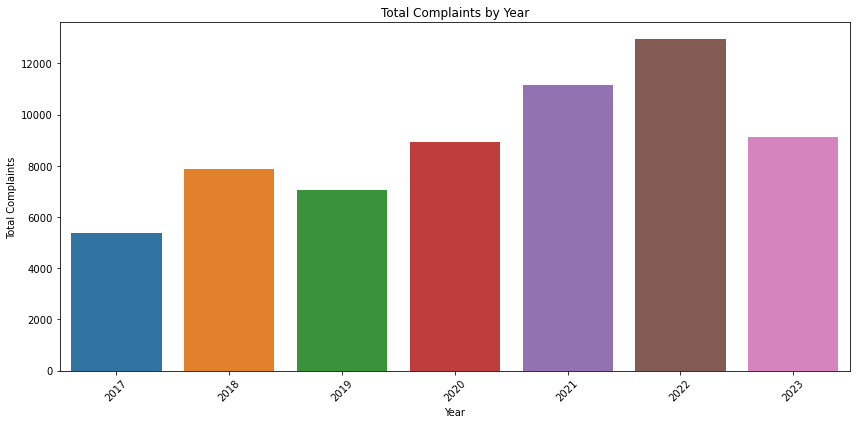

In [29]:
complaints_by_year = df.groupby('Year Submitted')['Complaint ID'].count().reset_index(name='Total Complaints')
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Year Submitted', y='Total Complaints', data=complaints_by_year, ax=ax)
ax.set_title('Total Complaints by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Total Complaints')
plt.xticks(rotation=45)
plt.tight_layout()

# Analyze complaint trends over time

C:\Users\ODOSA\AppData\Local\Temp/ipykernel_6264/1372459454.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
C:\Users\ODOSA\AppData\Local\Temp/ipykernel_6264/1372459454.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


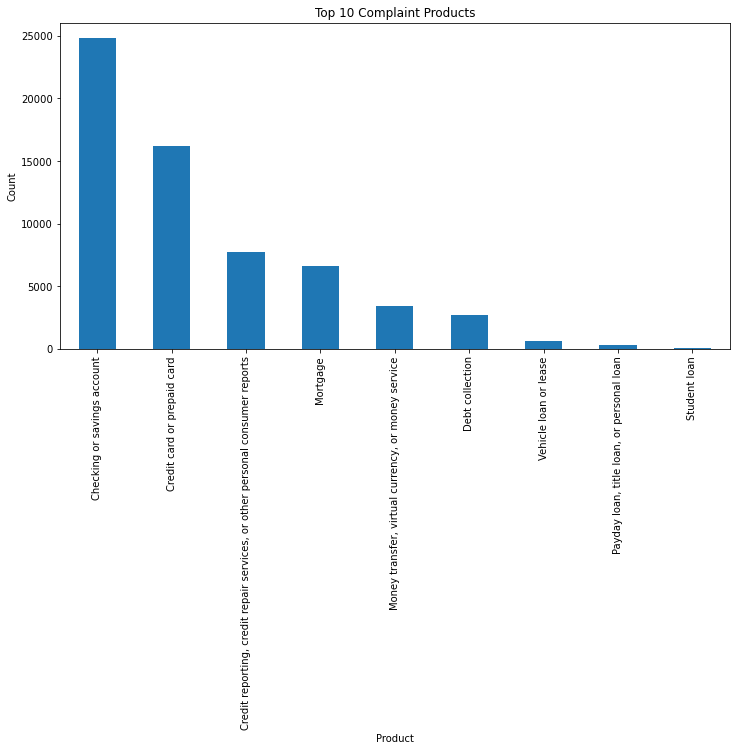

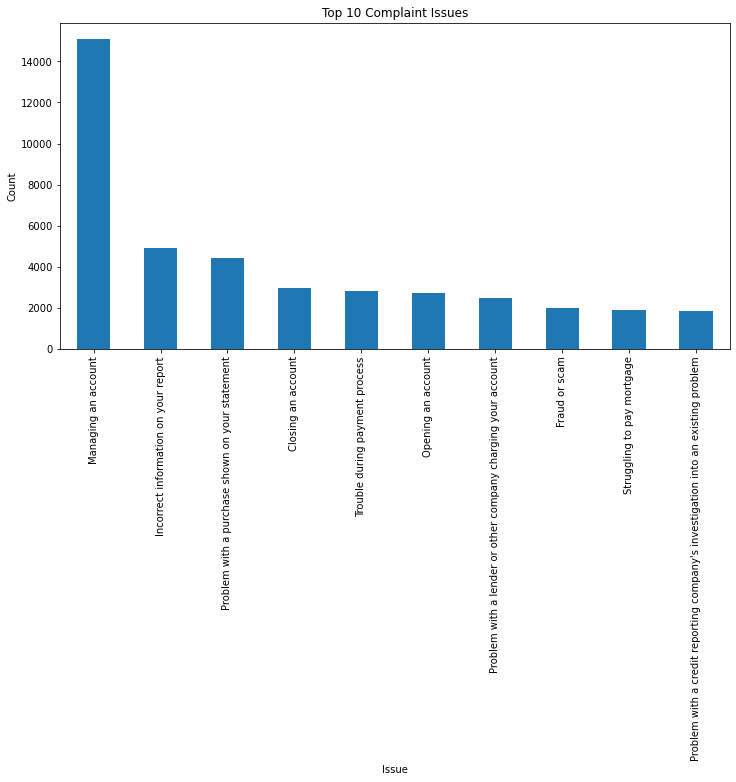

In [30]:
top_products = df['Product'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(12, 6))
top_products.plot(kind='bar', ax=ax)
ax.set_title('Top 10 Complaint Products')
ax.set_xlabel('Product')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

top_issues = df['Issue'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(12, 6))
top_issues.plot(kind='bar', ax=ax)
ax.set_title('Top 10 Complaint Issues')
ax.set_xlabel('Issue')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

# Analyze complaint types

In [31]:
df['Response time'] = (df['Date received'] - df['Date submitted']).dt.days

# Cretaing new column for the response time (number of day it took)

In [32]:
df.head()

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?,Year Submitted,Response time
0,4848023,Referral,2021-10-24,2021-10-27,New York,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Unknown,Company has responded to the consumer and the ...,Closed with explanation,Yes,2021,3
1,3621464,Web,2020-04-24,2020-04-24,Florida,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,Unknown,Company has responded to the consumer and the ...,Closed with monetary relief,Yes,2020,0
2,5818349,Web,2022-07-27,2022-07-27,California,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes,2022,0
3,7233015,Referral,2023-07-10,2023-07-11,California,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",No Response,In progress,Not Recorded,2023,1
4,5820224,Referral,2022-07-27,2022-07-28,Virginia,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes,2022,1


In [33]:
print(f"Average response time: {df['Response time'].mean():.2f} days")


# Checking average reponse time

Average response time: 1.22 days


In [34]:
timely_responses = df[df['Timely response?'] == 'Yes'].shape[0]
total_responses = df.shape[0]
print(f"Percentage of timely responses: {(timely_responses / total_responses) * 100:.2f}%")

# Analyze response times

Percentage of timely responses: 93.77%


In [35]:
top_issues_by_product = df.groupby(['Product', 'Issue'])['Complaint ID'].count().reset_index()
top_issues_by_product = top_issues_by_product.sort_values('Complaint ID', ascending=False).groupby('Product').head(3)

for product, group in top_issues_by_product.groupby('Product'):
    print(f"Top 3 issues for {product}:")
    print(group[['Issue', 'Complaint ID']].to_string(index=False))
    print()
    
# Identify recurring issues

Top 3 issues for Checking or savings account:
              Issue  Complaint ID
Managing an account         15109
 Closing an account          2953
 Opening an account          2725

Top 3 issues for Credit card or prepaid card:
                                          Issue  Complaint ID
Problem with a purchase shown on your statement          4415
                          Getting a credit card          1867
             Other features, terms, or problems          1633

Top 3 issues for Credit reporting, credit repair services, or other personal consumer reports:
                                                                           Issue  Complaint ID
                                            Incorrect information on your report          4145
Problem with a credit reporting company's investigation into an existing problem          1641
                                                     Improper use of your report          1517

Top 3 issues for Debt collection:
            

In [36]:
df.isna().sum()

Complaint ID                    0
Submitted via                   0
Date submitted                  0
Date received                   0
State                           0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Company public response         0
Company response to consumer    0
Timely response?                0
Year Submitted                  0
Response time                   0
dtype: int64

In [37]:
df.to_csv(r"C:\Users\ODOSA\Downloads\BOA.csv", index=False)